In [85]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np
from matplotlib.pylab import rcParams
import datetime as dt
rcParams['figure.figsize'] = 15, 6 # Make figures a little bigger

In [86]:
# Select WGS 84 for map format when checking out data from Analysisportal.se
xl = pd.ExcelFile('mardhund.xlsx')
xl.sheet_names
df = xl.parse("SLW Data")
pd.to_datetime(df.Startdatum, format='%Y-%m-%d')
df.head()

,Vetenskapligt namn,Svenskt namn,Organismgrupp,Fyndstatus,Observatör,Lokal,Län,Koordinatnoggrannhet (m),X,Y,Startdatum,Slutdatum,Datakälla,Osäker bestämning,Valideringstatus,ObservationId
0,Nyctereutes procyonoides,mårdhund,Däggdjur,Present,Mats Bergquist,"Grustäkten, BDX, S Rödberget",Norrbotten,250,"21,658947439","65,780216527",2008-11-16,2008-11-16,Artportalen,False,Unvalidated,15612214
1,Nyctereutes procyonoides,mårdhund,Däggdjur,Present,Mats Bergquist,"Söribäcken, Mossabäcken V Prästholm",Norrbotten,50,"22,081856308","65,911685901",2008-11-16,2008-11-16,Artportalen,False,Unvalidated,15612215
2,Nyctereutes procyonoides,mårdhund,Däggdjur,Present,Nils Östen Nilsson,Gräsås,Halland,50,"12,875786529","56,894863619",2010-08-21,2010-08-21,Artportalen,False,Unvalidated,23743795
3,Nyctereutes procyonoides,mårdhund,Däggdjur,Present,Stefan Björn,"Ö Bondetorp, Sandåkrarna",Kalmar,100,"15,882259139","56,775014784",1993-08-12,1993-08-12,Artportalen,True,Unvalidated,37828738
4,Nyctereutes procyonoides,mårdhund,Däggdjur,Present,Anders Kruger,Öratjärnvägen,Dalarnas,50,"16,053469049","60,862874956",2014-06-05,2014-06-05,Artportalen,False,Unvalidated,50783545


# Simple statistics

1. Distribution of species per region (Län).

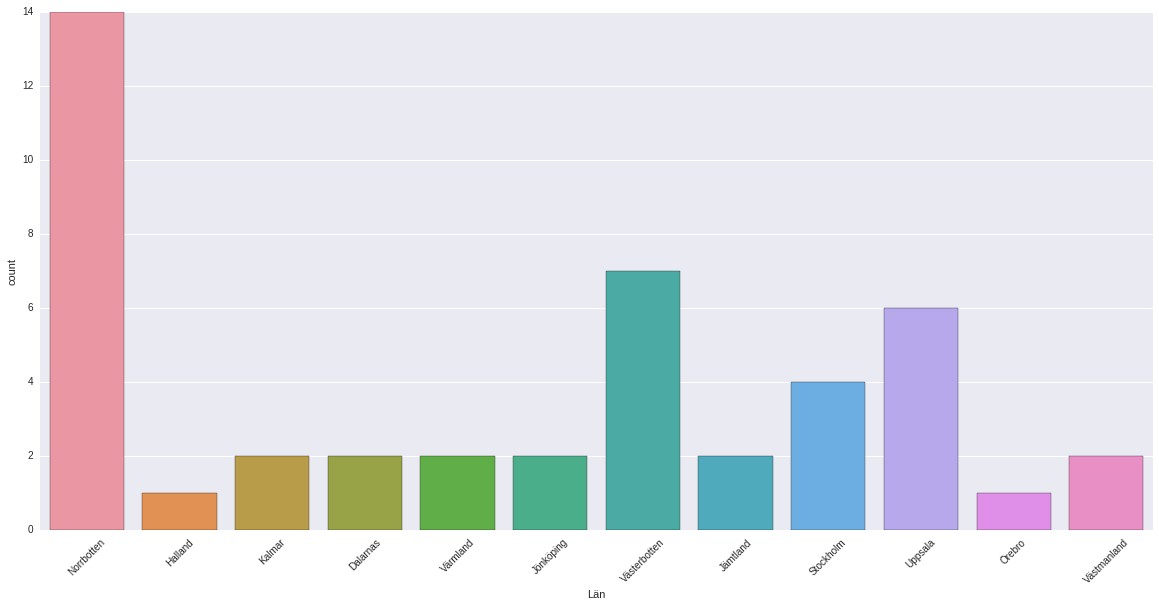

In [87]:
lan = sns.factorplot('Län', data=df, kind='count', size=8, aspect=2)
lan.set_xticklabels(rotation=45)

# Contributors

To find out who contributed to the species observation, you can analyse the "Observatör" column. 

In [88]:
# Show the 10 contributors that contributed the most. (change value of .nlargest() to show more) 
df['Observatör'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True).nlargest(10)

Mats Bergquist                  7
Bertil Brånin                   2
Jan Andersson                   2
Henrik Berg                     2
Nils Östen Nilsson              1
Marcus Sundbom                  1
Ralf Lundmark, Andreas Press    1
Per Arne Fransson               1
Göran Andervass                 1
Stefan Björn                    1
Name: Observatör, dtype: int64

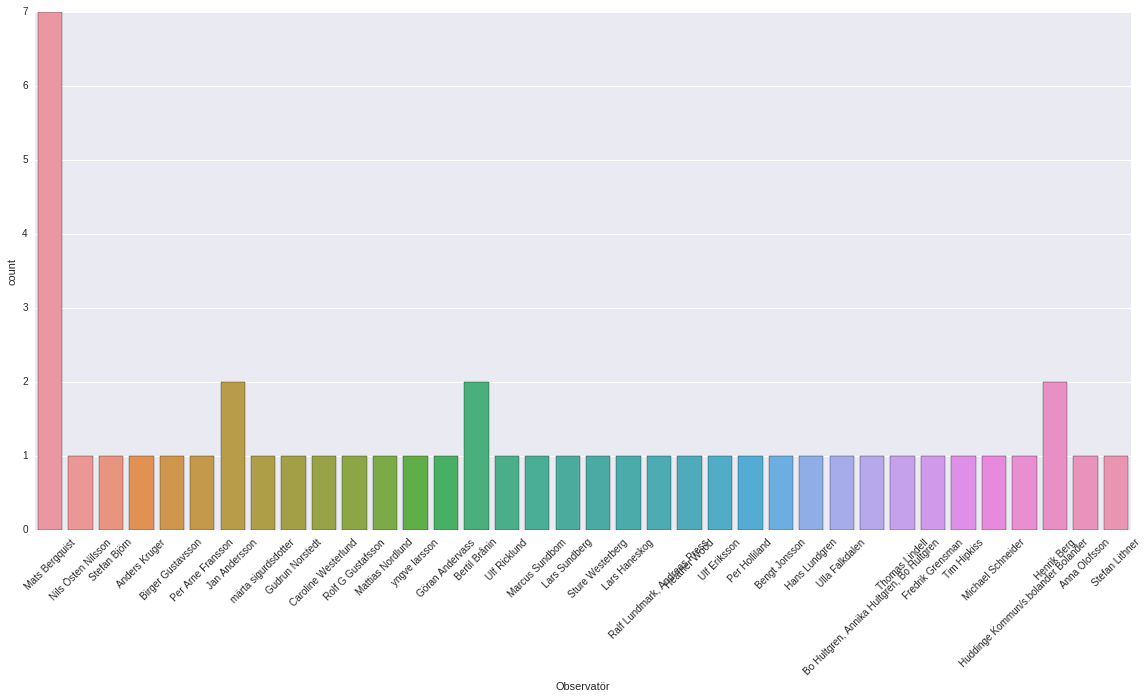

In [89]:
# A little plot of the contributors
citizenscientists = sns.factorplot('Observatör', data=df, kind='count', size=8, aspect=2)
citizenscientists.set_xticklabels(rotation=45)

# Geographic visualization
1. Make a new column where the WGS84 columns are formatted properly.
2. Make a simple map using the folium library. 

In [90]:
# Create a new column for the X and Y values, to be converted to latlong below
df['latlong'] = list(zip(df.X, df.Y))

In [91]:
map_1 = folium.Map(location=[62.128, 18.6435], zoom_start=4,
                   tiles='Mapbox Bright')

for index, row in df.iterrows():
    # Transform X,Y to latlong by switching place and replacing comma with dot
    longitude = row['latlong'][1].replace(',', '.')
    latitude = row['latlong'][0].replace(',', '.')
    
    #print(row)
    vet = str(row['Vetenskapligt namn'])
    svnamn = str(row['Svenskt namn']).capitalize()
    observ = str(row['Observatör'])
    lokal = str(row['Lokal'])
    lan = str(row['Län'])
    koord = str(row['Koordinatnoggrannhet (m)'])
    datum = str(row['Startdatum'])
    datakalla = str(row['Datakälla'])
    
    label = str(vet + " - " + svnamn + " | " + observ + " | " + lokal + ", " 
                + lan + " | Koordinatnogrannhet (m): " + koord + " | " + 
                datum + " | " + datakalla + " | Latitud: " 
                + latitude + " | Longitud: " + longitude)
            
    folium.Marker([longitude, latitude], popup=label).add_to(map_1)
    # Add to change colors: icon = folium.Icon(color ='blue')

map_1.save('mardhund.html')
map_1

In [92]:
!scp mardhund.html chrisk@genuskollen.se:~/files.christopherkullenberg.se

mardhund.html                                 100%   53KB  53.0KB/s   00:00    


# Time series

1. Create dataframe with DateTime as index.
2. Plot some value on time series frame. 

In [93]:
# Create dataframe with DateTime as index. For time series.
ts = df.set_index(pd.DatetimeIndex(df['Startdatum'])) # Create a dataframe with datetime as index
print(ts.index) # make sure the dtype='datetime64[ns]'
print("Oldest value: " + ts['Startdatum'].min())
print("Newest value: " + ts['Startdatum'].max())

DatetimeIndex(['2008-11-16', '2008-11-16', '2010-08-21', '1993-08-12',
               '2014-06-05', '2007-05-09', '2016-05-06', '2016-06-05',
               '2016-05-31', '2016-06-07', '2011-06-01', '2015-08-23',
               '1993-05-22', '2014-04-10', '2014-02-02', '2013-10-06',
               '2013-06-19', '2010-08-05', '2009-09-06', '2009-02-01',
               '2008-11-07', '2008-11-07', '2016-06-28', '2016-03-10',
               '2014-10-07', '2012-04-01', '2013-09-10', '2013-06-02',
               '2013-01-31', '2012-01-08', '2009-06-23', '2009-06-24',
               '2009-05-21', '2008-12-30', '1999-06-06', '2008-11-05',
               '2008-11-06', '2008-11-06', '2007-06-15', '2008-07-28',
               '1995-07-06', '1997-06-30', '1997-03-31', '2014-04-06',
               '2010-07-27'],
              dtype='datetime64[ns]', freq=None)
Oldest value: 1993-05-22
Newest value: 2016-06-28


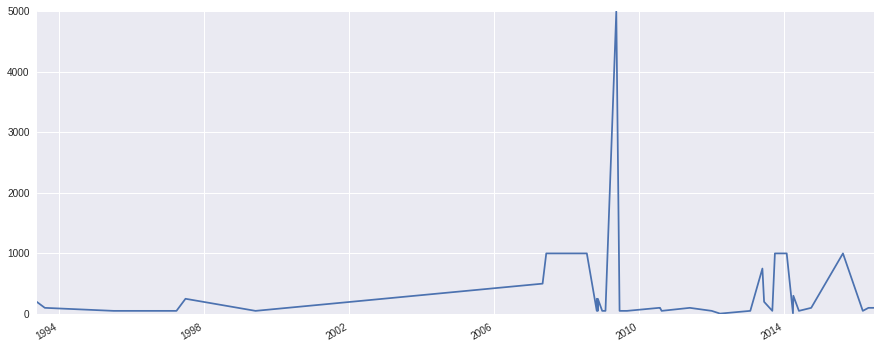

In [28]:
# Plotting time series of the coordinate accuracy. Has no real meaning, just for code. 
ts['Koordinatnoggrannhet (m)'].plot()

In [80]:
!git add mardhund.html mardhund.ipynb mardhund.xlsx

In [81]:
!git commit -m "Updating mårdhund"

[master 7a284aa] Updating mårdhund
 3 files changed, 1804 insertions(+)
 create mode 100644 mardhund.html
 create mode 100644 mardhund.ipynb
 create mode 100644 mardhund.xlsx


In [84]:
!git push origin master

Everything up-to-date
